In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Deep Learning for Computer Vision

## Convolutional Neural Networks

Let's use a convnet on the MNIST dataset.

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(mnist_xtrain, mnist_ytrain), (mnist_xtest, mnist_ytest) = mnist.load_data()

Let's instantiate a 2D CNN:

In [4]:
mnist_model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [5]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

The convolutional part of the network passes 3D tensors, the depth of which is determined by the number of filters. With no padding, this network shrinks the height and width of each tensor that passes through.

Let's prep the dataset.

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
mnist_xtrain.shape

(60000, 28, 28)

In [8]:
mnist_xtest.shape

(10000, 28, 28)

In [9]:
mnist_xtrain = mnist_xtrain.reshape((60000, 28, 28, 1))
mnist_xtest = mnist_xtest.reshape((10000, 28, 28, 1))

In [10]:
mnist_xtrain = mnist_xtrain.astype('float32') / 255
mnist_xtest = mnist_xtest.astype('float32') / 255

In [11]:
mnist_ytrain.shape

(60000,)

In [12]:
mnist_ytrain = to_categorical(mnist_ytrain)
mnist_ytest = to_categorical(mnist_ytest)

In [13]:
mnist_ytrain.shape

(60000, 10)

In [14]:
mnist_model.compile(optimizer='rmsprop',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [15]:
mnist_model.fit(mnist_xtrain, mnist_ytrain, epochs=5, batch_size=64)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 22s 371us/sample - loss: 0.1663 - accuracy: 0.9498
Epoch 2/5
60000/60000 [==============================] - 21s 342us/sample - loss: 0.0467 - accuracy: 0.9857
Epoch 3/5
60000/60000 [==============================] - 22s 359us/sample - loss: 0.0316 - accuracy: 0.9903
Epoch 4/5
60000/60000 [==============================] - 21s 353us/sample - loss: 0.0240 - accuracy: 0.9931
Epoch 5/5
60000/60000 [==============================] - 21s 342us/sample - loss: 0.0188 - accuracy: 0.9941


In [16]:
mnist_model.evaluate(mnist_xtest, mnist_ytest, verbose=0)

[0.0357581198506683, 0.9888]

Strides of 1 for convolutional filters are the most common in practice. The filter size will affect the output of the layer. For a feature map of size (5, 5), a filter sized (3, 3) applied to it only has 9 pixels that it can be centered on using 'valid' padding. The output of this filtering operation will be (3, 3). For the (3, 3) kernel, there is a 1 cell buffer between the filter center and any edge, so in general it will reduce the size of the map being operated on by 2 in the height and width dimensions. This is seen in the model summary.

Instead of using strides to downscale feature maps, pooling layers are used instead. Pooling layers shrink the feature map size, and cause subsequent filters to evaluate a larger fraction of the spatial dimensions of the map. They effectively make the filters "larger." This helps the CNN learn higher-level features better. Additionally, it prevents overfitting by greatly reducing the number of parameters set up at the interface with the dense layers.

For the next section, we'll use the dogs and cats dataset from Kaggle.

In [17]:
import os, shutil

In [18]:
#original_dataset_dir = '/Users/mattjwilliams/Downloads/dogs-v-cats'

In [51]:
base_dir = '/Volumes/WD External/KerasDeepLearning/dogs_and_cats_small'
#os.mkdir(base_dir)

In [52]:
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

In [53]:
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

In [54]:
train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

In [55]:
validation_dir = os.path.join(base_dir, 'validation')
# #os.mkdir(validation_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
# #os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# #os.mkdir(validation_dogs_dir)

In [56]:
test_cats_dir = os.path.join(test_dir, 'cats')
# #os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
# #os.mkdir(test_dogs_dir)

The original Kaggle dataset is quite large. We want to train a CNN with only a small subset of images: 1000 for training, 500 for validation, and 500 for testing. The cat image names go from cat.0.jpeg to cat.12499.jpeg. Let's copy the first 1000 to our training directory.

In [25]:
#fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

In [26]:
# def move_cats_train(fnames):
#     for fname in fnames:
#         src = os.path.join(original_dataset_dir, fname)
#         dst = os.path.join(train_cats_dir, fname)
#         shutil.copyfile(src, dst)
        
# def move_cats_val(fnames):
#     for fname in fnames:
#         src = os.path.join(original_dataset_dir, fname)
#         dst = os.path.join(validation_cats_dir, fname)
#         shutil.copyfile(src, dst)
        
# def move_cats_test(fnames):
#     for fname in fnames:
#         src = os.path.join(original_dataset_dir, fname)
#         dst = os.path.join(test_cats_dir, fname)
#         shutil.copyfile(src, dst)

In [27]:
# move_cats_train(fnames)

Let's move the next 500 to validation.

In [28]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]

In [29]:
# move_cats_val(fnames)

Move the next 500 to testing.

In [30]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]

In [31]:
# move_cats_test(fnames)

Now repeat for dogs.

In [32]:
# def move_dogs_train(fnames):
#     for fname in fnames:
#         src = os.path.join(original_dataset_dir, fname)
#         dst = os.path.join(train_dogs_dir, fname)
#         shutil.copyfile(src, dst)
        
# def move_dogs_val(fnames):
#     for fname in fnames:
#         src = os.path.join(original_dataset_dir, fname)
#         dst = os.path.join(validation_dogs_dir, fname)
#         shutil.copyfile(src, dst)
        
# def move_dogs_test(fnames):
#     for fname in fnames:
#         src = os.path.join(original_dataset_dir, fname)
#         dst = os.path.join(test_dogs_dir, fname)
#         shutil.copyfile(src, dst)

In [33]:
# move_dogs_train(['dog.{}.jpg'.format(i) for i in range(1000)])
# move_dogs_val(['dog.{}.jpg'.format(i) for i in range(1000, 1500)])
# move_dogs_test(['dog.{}.jpg'.format(i) for i in range(1500, 2000)])

In [83]:
print('total cat training images: ', len(os.listdir(train_cats_dir)))
print('total cat validation images: ', len(os.listdir(validation_cats_dir)))
print('total cat test images: ', len(os.listdir(test_cats_dir)))
print('total dog training images: ', len(os.listdir(train_dogs_dir)))
print('total dog validation images: ', len(os.listdir(validation_dogs_dir)))
print('total dog test images: ', len(os.listdir(test_dogs_dir)))

total cat training images:  1000
total cat validation images:  500
total cat test images:  500
total dog training images:  1000
total dog validation images:  500
total dog test images:  500


In [35]:
dog_model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', 
                       input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [36]:
dog_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [45]:
from tensorflow.keras import optimizers

In [38]:
dog_model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [41]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Since the directories contain one subdirectory per class, the generator is able to determine the number of classes.

In [42]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


The batch generator is working. We'll now train the model using the _fit_generator()_ method, which expects a generator as an input. Since generators need to be told when to stop, the _steps_per_epoch_ paramter will perform this task. We are generating batches of 20, so 100 steps per epoch will be needed.

In [43]:
# dog_history = dog_model.fit_generator(train_generator,
#                                      steps_per_epoch=100,
#                                      epochs=30,
#                                      validation_data=validation_generator,
#                                      validation_steps=50)

# dog_model.save('dogs_and_cats_small_1.h5')
dog_model.load_weights('dogs_and_cats_small_1.h5')

In [44]:
import matplotlib.pyplot as plt

In [ ]:
acc = dog_history.history['acc']
val_acc = dog_history.history['val_acc']
loss = dog_history.history['loss']
val_loss = dog_history.history['val_loss']

In [ ]:
epochs = range(1, len(acc) + 1)

In [ ]:
plt.plot(epochs, acc, 'b+', label='training accuracy')
plt.plot(epochs, val_acc, 'b*', label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(epochs, loss, 'b+', label='training loss')
plt.plot(epochs, val_loss, 'b*', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
np.argmin(val_loss)

In [ ]:
np.argmax(val_acc)

In [ ]:
print(val_loss[11])
print(val_loss[25])

Of note, the validation loss reaches its minimum value at epoch 11, but let's check with a smoothed version of the loss.

In [ ]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [ ]:
smooth_val_loss = smooth_curve(val_loss)

In [ ]:
np.argmin(smooth_val_loss)

In [ ]:
plt.plot(epochs, loss, 'b+', label='training loss')
plt.plot(epochs, smooth_val_loss, 'b*', label='smoothed validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Data Augmentation

One way to prevent overfitting in these small training datasets is to perform data augmentation. This means performing perturbations of existing images to give the network different "looks" at the same image, effectively increasing the size of the dataset. This can be done through translation, rotation, reflection, ect.

We'll use the ImageDataGenerator instance to perform random augmentations.

In [84]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [46]:
from tensorflow.keras.preprocessing import image

In [47]:
fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]

In [48]:
img_path = fnames[3]

In [49]:
img = image.load_img(img_path, target_size=(150, 150))

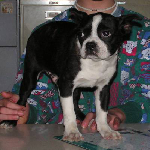

In [50]:
img

In [51]:
x = image.img_to_array(img) # converts image to a numpy array

In [52]:
x.shape?

Type:        tuple
String form: (150, 150, 3)
Length:      3
Docstring:  
Built-in immutable sequence.

If no argument is given, the constructor returns an empty tuple.
If iterable is specified the tuple is initialized from iterable's items.

If the argument is a tuple, the return value is the same object.


We need to include the batch as a dimension:

In [53]:
x = x[np.newaxis, ...]

In [54]:
x.shape

(1, 150, 150, 3)

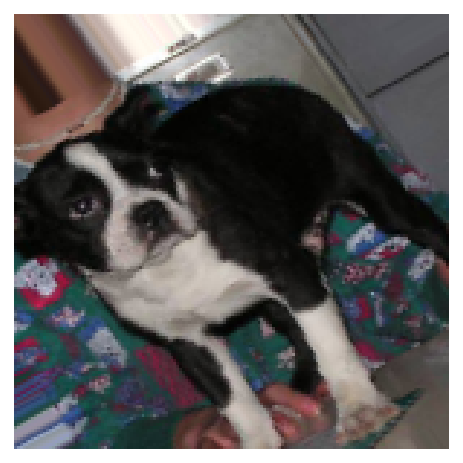

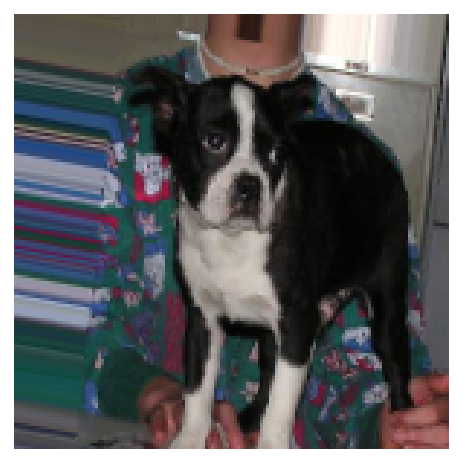

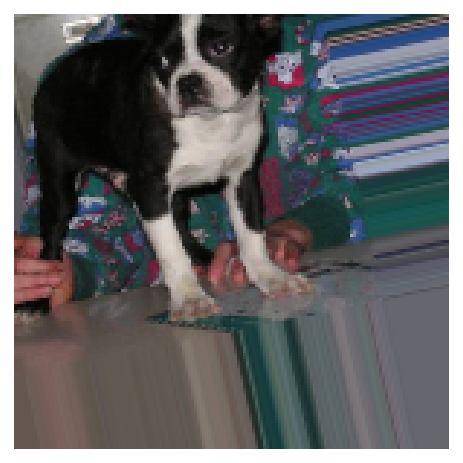

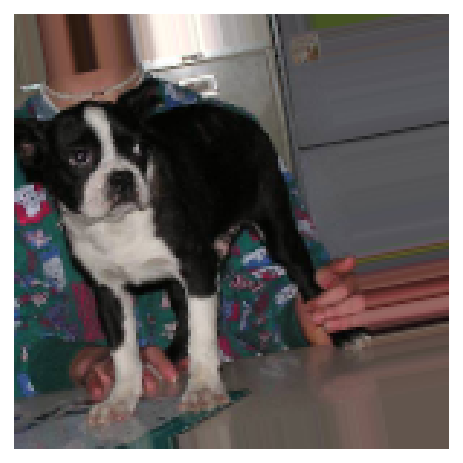

In [55]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.axis('off')
    #plt.tight_layout()
    i += 1
    if i % 4 == 0:
        break

In order to further combat overfitting, we will add dropout to the model.

In [56]:
dog_model2 = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', 
                       input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [58]:
dog_model2.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [85]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # we don't augment the validation or test data

In [86]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150, 150),
                                                       batch_size=32,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [62]:
dog_history2 = dog_model2.fit_generator(train_generator,
                                       steps_per_epoch=100,
                                       epochs=100,
                                       validation_data=validation_generator,
                                       validation_steps=50)



Epoch 1/100
100/100 [==============================] - 197s 2s/step - loss: 0.6939 - acc: 0.5246 - val_loss: 0.6859 - val_acc: 0.5032
Epoch 2/100
100/100 [==============================] - 189s 2s/step - loss: 0.6832 - acc: 0.5606 - val_loss: 0.6845 - val_acc: 0.5362
Epoch 3/100
100/100 [==============================] - 197s 2s/step - loss: 0.6752 - acc: 0.5829 - val_loss: 0.6497 - val_acc: 0.6079
Epoch 4/100
100/100 [==============================] - 189s 2s/step - loss: 0.6544 - acc: 0.6203 - val_loss: 0.6365 - val_acc: 0.6250
Epoch 5/100
100/100 [==============================] - 860s 9s/step - loss: 0.6421 - acc: 0.6332 - val_loss: 0.6164 - val_acc: 0.6504
Epoch 6/100
100/100 [==============================] - 822s 8s/step - loss: 0.6350 - acc: 0.6373 - val_loss: 0.6056 - val_acc: 0.6605
Epoch 7/100
100/100 [==============================] - 190s 2s/step - loss: 0.6194 - acc: 0.6545 - val_loss: 0.5769 - val_acc: 0.6954
Epoch 8/100
100/100 [==============================] - 546s 5s

NameError: name 'model' is not defined

In [63]:
dog_model2.save('dogs_and_cats_small_2.h5')

with open('dog_model2_train_history', 'wb') as file_pi:
    pickle.dump(dog_history2.history, file_pi)

OSError: [Errno 30] Read-only file system: '/dog_model2_train_history'

In [67]:
with open('test_write.txt', 'r') as f:
    print(f.read())

Ello gubnah


In [68]:
dog_model2 = keras.models.load_model('dogs_and_cats_small_2.h5')

In [26]:
import pandas as pd

In [71]:
dog_df = pd.read_csv('dog_model2_history_log.csv')

In [72]:
dog_df.head

<bound method NDFrame.head of     epoch       acc      loss   val_acc  val_loss
0       0  0.523043  0.692107  0.533629  0.678344
1       1  0.563128  0.680168  0.616117  0.652974
2       2  0.596907  0.657629  0.602792  0.643090
3       3  0.618371  0.644370  0.564086  0.700091
4       4  0.641563  0.629522  0.618655  0.624626
..    ...       ...       ...       ...       ...
95     95  0.845791  0.343432  0.827411  0.388908
96     96  0.838700  0.358069  0.831853  0.396788
97     97  0.850188  0.340383  0.797589  0.490327
98     98  0.847854  0.344911  0.792513  0.460366
99     99  0.845960  0.343158  0.799492  0.469922

[100 rows x 5 columns]>

In [81]:
dog_model2_acc = dog_df['acc']
dog_model2_loss = dog_df['loss']
dog_model2_val_acc = dog_df['val_acc']
dog_model2_val_loss = dog_df['val_loss']

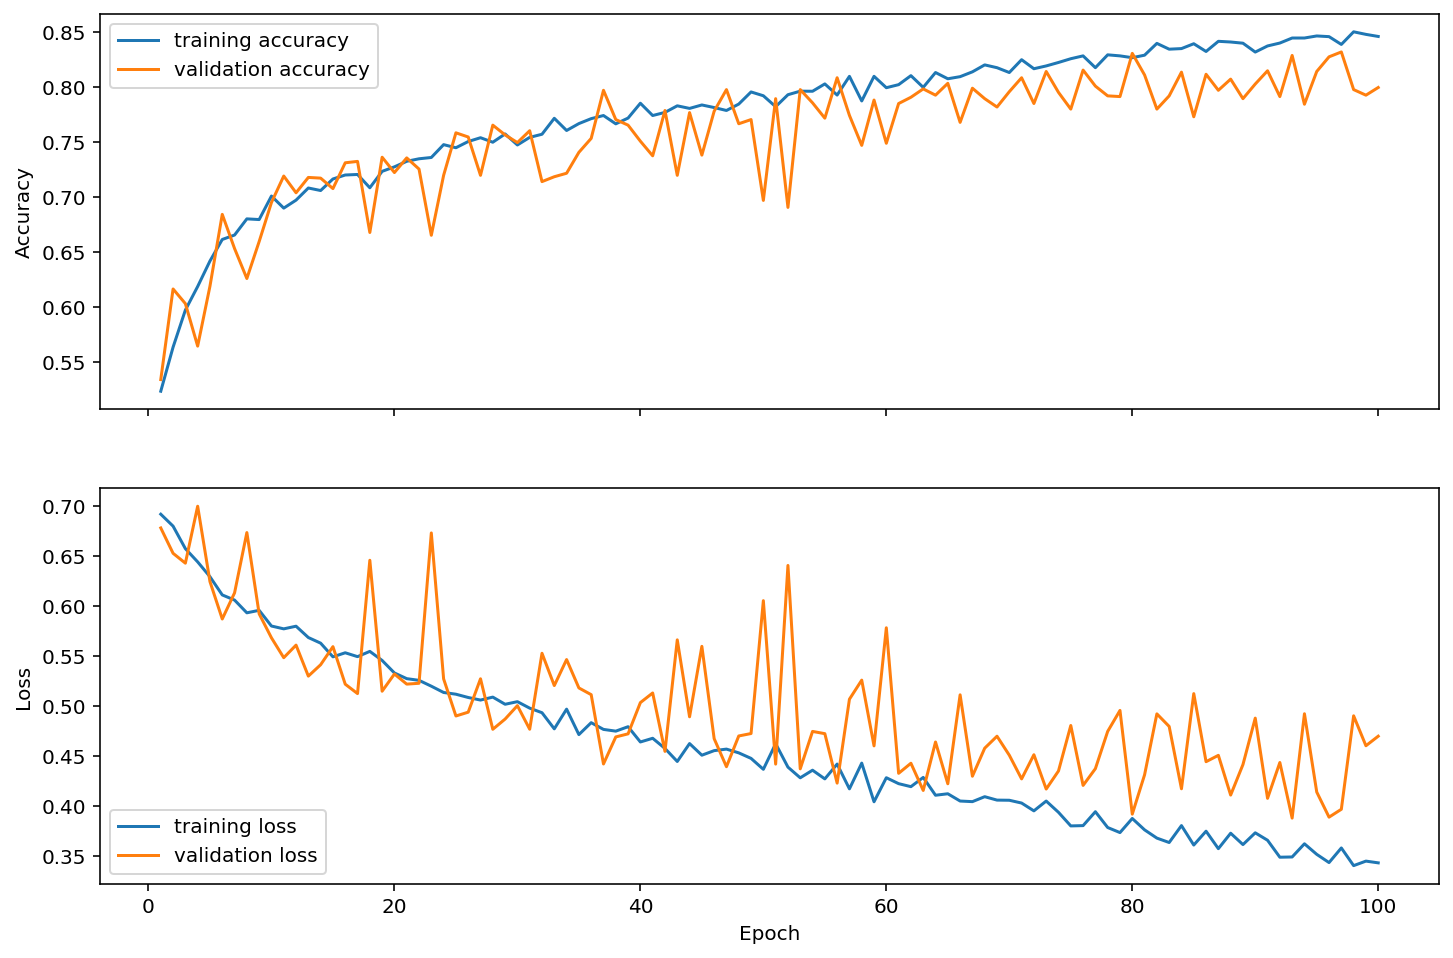

In [95]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ax[0].plot(range(1, len(dog_model2_acc) + 1), dog_model2_acc, label='training accuracy')
ax[0].plot(range(1, len(dog_model2_val_acc) + 1), dog_model2_val_acc, label='validation accuracy')
ax[1].plot(range(1, len(dog_model2_loss) + 1), dog_model2_loss, label='training loss')
ax[1].plot(range(1, len(dog_model2_val_loss) + 1), dog_model2_val_loss, label='validation loss')
ax[1].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[0].legend(loc=2)
ax[1].legend(loc=3)

In [102]:
test_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150, 150),
                                                       batch_size=32,
                                                       class_mode='binary')

Found 1000 images belonging to 2 classes.


In [103]:
dog_model2.evaluate(test_generator)

32/32 [==============================] - 8s 261ms/step - loss: 0.3673 - acc: 0.8300


[0.3673086538910866, 0.83]

We're now at an accuracy of 83%.

## Using a Pretrained Convnet

We can use a previously trained convolutional base, and just retrain the top fully-connected dense layer. We will do this with VGG16, trained on ImageNet.

In [47]:
from tensorflow.keras.applications import VGG16

In [48]:
conv_base = keras.models.load_model('conv_base.h5')

In [49]:
conv_base.compile(loss='binary_crossentropy',
                 optimizer = optimizers.RMSprop(learning_rate=1e-4),
                 metrics=['acc'])

In [50]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

## Fast Feature Extraction without Data Augmentation

One way to use our pre-trained convnet base is to run the dataset through it, without a fully connected top or output layer, and record the results in a Numpy array on disk. Then, this input is used on the standalone dense classifier.

In [57]:
base_dir

'/Volumes/WD External/KerasDeepLearning/dogs_and_cats_small'

In [58]:
train_dir

'/Volumes/WD External/KerasDeepLearning/dogs_and_cats_small/train'

In [59]:
validation_dir

'/Volumes/WD External/KerasDeepLearning/dogs_and_cats_small/validation'

In [60]:
test_dir

'/Volumes/WD External/KerasDeepLearning/dogs_and_cats_small/test'

In [61]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [62]:
batch_size=20

In [63]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512)) # matches the output of the conv_base
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                           target_size=(150, 150),
                                           batch_size=batch_size,
                                           class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [64]:
train_features = extract_features(train_dir, 2000)
validation_features = extract_features(validation_dir, 1000)
test_features = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.


KeyboardInterrupt: 

In [130]:
train_labels = train_features[1]
validation_labels = validation_features[1]
test_labels = test_features[1]

In [132]:
train_features = train_features[0]
validation_features = validation_features[0]
test_features = test_features[0]

In [133]:
train_features.shape

(2000, 4, 4, 512)

Before directing the output of conv_base to our dense network, the input needs to be flattened from (samples, 4, 4, 512) to (samples, 8192).

In [134]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features= np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [135]:
dog_model2_top = keras.models.Sequential([
    keras.layers.Dense(256, activation='relu', input_dim=4 * 4 * 512),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [136]:
dog_model2_top.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [137]:
dog_model2_top.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [138]:
history = dog_model2_top.fit(train_features, train_labels,
                            epochs=30, batch_size=20,
                            validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/sample - loss: 0.4688 - acc: 0.7660 - val_loss: 0.2989 - val_acc: 0.8930
Epoch 2/30
2000/2000 [==============================] - 2s 988us/sample - loss: 0.2913 - acc: 0.8840 - val_loss: 0.3025 - val_acc: 0.8730
Epoch 3/30
2000/2000 [==============================] - 2s 996us/sample - loss: 0.2441 - acc: 0.8965 - val_loss: 0.2823 - val_acc: 0.8840
Epoch 4/30
2000/2000 [==============================] - 2s 991us/sample - loss: 0.2066 - acc: 0.9150 - val_loss: 0.2579 - val_acc: 0.9000
Epoch 5/30
2000/2000 [==============================] - 2s 1ms/sample - loss: 0.1859 - acc: 0.9215 - val_loss: 0.2391 - val_acc: 0.9020
Epoch 6/30
2000/2000 [==============================] - 2s 1ms/sample - loss: 0.1480 - acc: 0.9470 - val_loss: 0.2387 - val_acc: 0.9030
Epoch 7/30
2000/2000 [==============================] - 2s 1ms/sample - loss: 0.1411 - acc: 0.9425 - val_loss: 0.2367 - val_acc: 0

In [139]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

In [140]:
epochs = range(1, len(acc) + 1)

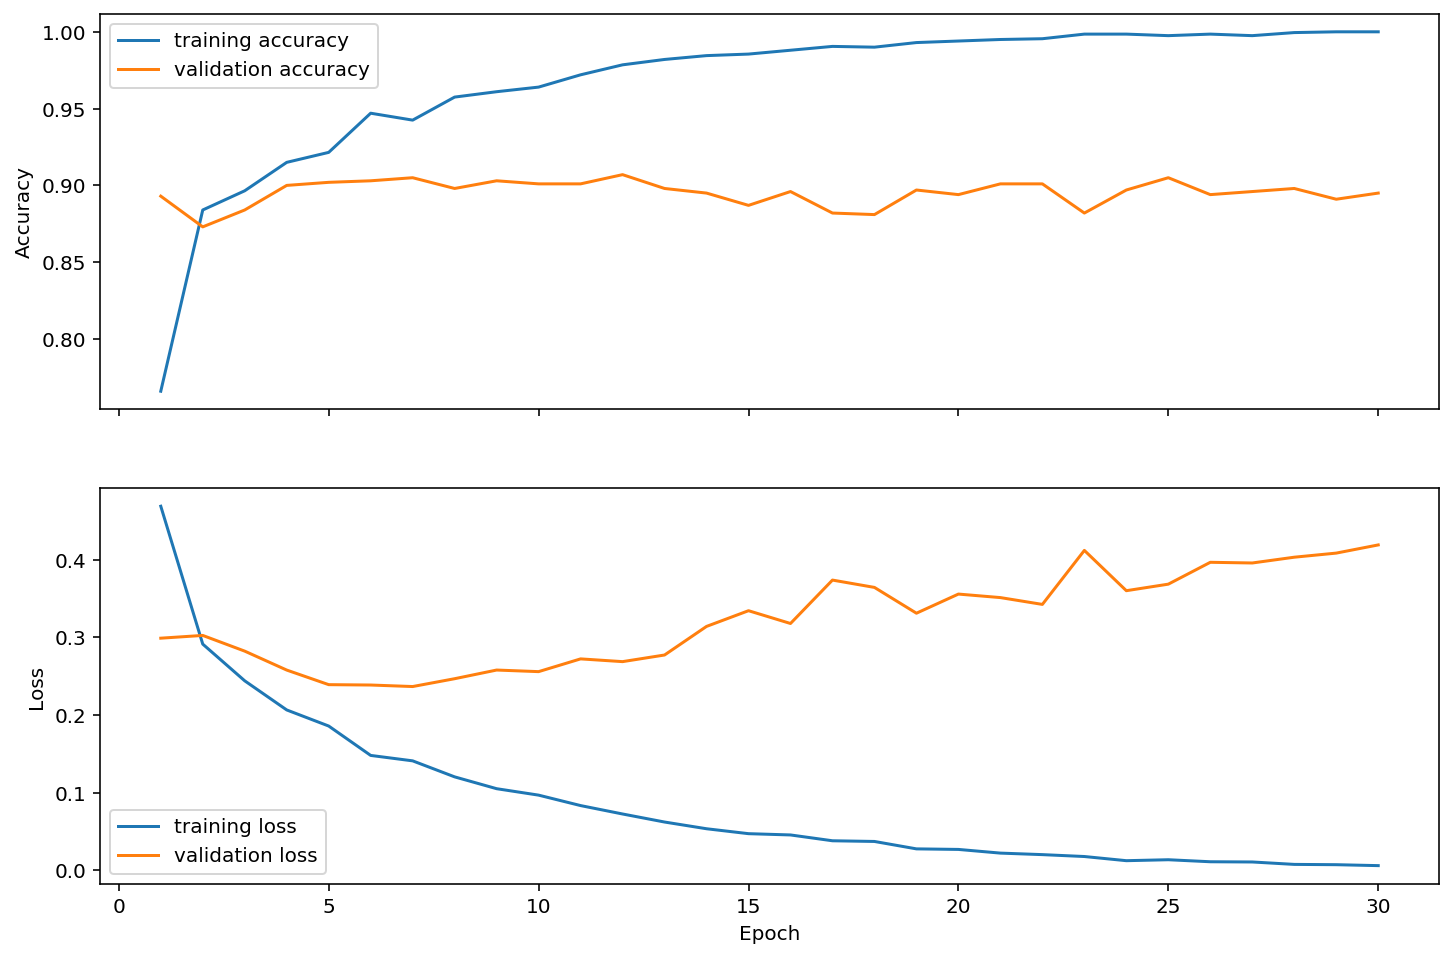

In [143]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ax[0].plot(epochs, acc, label='training accuracy')
ax[0].plot(epochs, val_acc, label='validation accuracy')
ax[1].plot(epochs, loss, label='training loss')
ax[1].plot(epochs, val_loss, label='validation loss')
ax[1].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[0].legend(loc=2)
ax[1].legend(loc=3)

The validation accuracy is pretty good (about 90%), but the model begins overfitting right away because no data augmentation is being used.

In order to use data augmentation, we need to run the model using GPUs, or else the problem is intractible. In this case we'll train in Google Colab, and then load the base here.

In [65]:
dog_model_w_aug = keras.models.Sequential([
    conv_base,
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [66]:
dog_model_w_aug.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


The convolutional base here is very large, and we're adding another 2 million parameters on top of it. Before training, we want to freeze the base, so that its weights aren't updated.

In [67]:
print('Trainable weights before freezing conv_base: ', len(dog_model_w_aug.trainable_weights))

Trainable weights before freezing conv_base:  30


In [68]:
conv_base.trainable = False

In [69]:
print('Trainable weights after freezing conv_base: ', len(dog_model_w_aug.trainable_weights))

Trainable weights after freezing conv_base:  4


There are now only 4 weight tensors that will be updated: two per layer (weights and biases).

In [70]:
dog_model_w_aug.compile(loss='binary_crossentropy',
                       optimizer=optimizers.RMSprop(learning_rate=2e-5),
                       metrics=['acc'])

In [71]:
dog_model_w_aug.save('dog_model_w_aug.h5')

I trained the model in Google Colab, and brought the trained model's h5 file, along with a CSV of the history, back here. They are callsed dog_model_w_aug_trained.h5 and dog_history_aug_log.csv

In [74]:
dog_aug_df = pd.read_csv('dog_history_aug_log.csv')

In [75]:
dog_aug_df.head()

,epoch,acc,loss,val_acc,val_loss
0,0,0.6740,0.605728,0.826,0.453885
1,1,0.7805,0.489055,0.856,0.364301
2,2,0.7935,0.440174,0.868,0.330148
3,3,0.8095,0.414596,0.882,0.305587
4,4,0.8310,0.385786,0.879,0.290870


In [76]:
dog_aug_acc = dog_aug_df['acc']
dog_aug_loss = dog_aug_df['loss']
dog_aug_val_acc = dog_aug_df['val_acc']
dog_aug_val_loss = dog_aug_df['val_loss']

In [77]:
epochs = range(1, len(dog_aug_acc)+1)

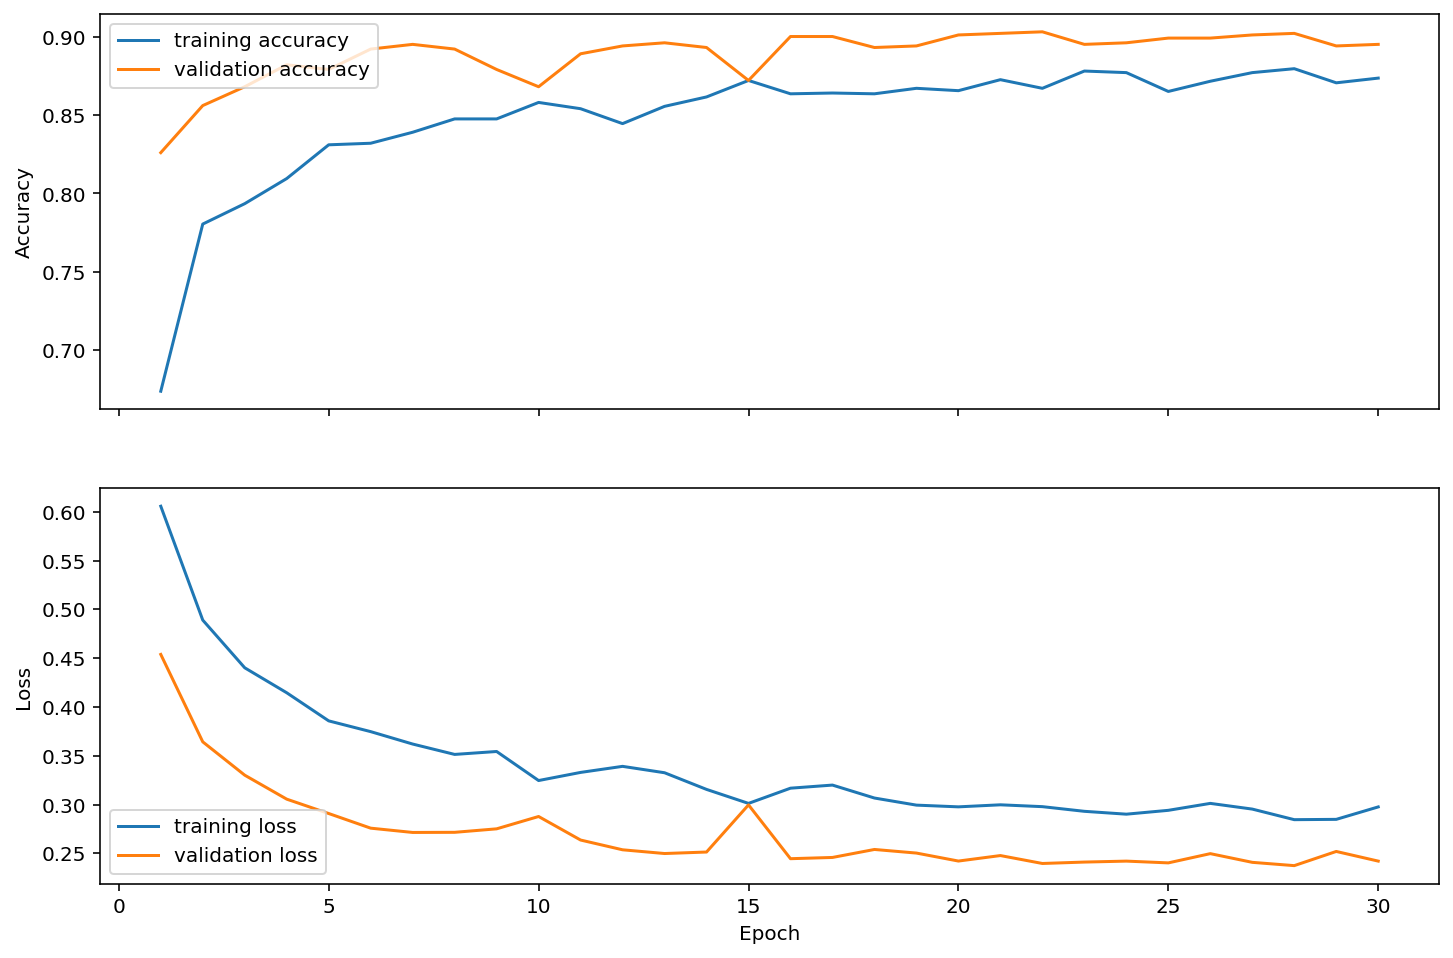

In [78]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ax[0].plot(epochs, dog_aug_acc, label='training accuracy')
ax[0].plot(epochs, dog_aug_val_acc, label='validation accuracy')
ax[1].plot(epochs, dog_aug_loss, label='training loss')
ax[1].plot(epochs, dog_aug_val_loss, label='validation loss')
ax[1].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[0].legend(loc=2)
ax[1].legend(loc=3)

## Fine Tuning

Sometimes you will unfreeze a few of the top layers, which look at the more abstract representations of the data. It's only possible to fune-tune the convolutional base once the classifier on top has been trained. We'll first load the model that was trained in Colab, and perform the layer freezing.

In [79]:
dog_model_aug_trained = keras.models.load_model('dog_model_w_aug_trained.h5')

In [80]:
dog_model_aug_trained.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


We will freeze all the layers up to block5_conv1, and have the last 3 layers be trainable.

In [81]:
conv_base.trainable=True

set_trainable=False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

The above code initially sets all layers to trainable, and then freezes them all one-by-one until it hits block5, at which point is leaves those layers as trainable. We can now begin training.

In [87]:
dog_model_aug_trained.compile(loss='binary_crossentropy',
                             optimizer=optimizers.RMSprop(learning_rate=1e-5),
                             metrics=['acc'])

In [90]:
dog_model_aug_trained.save('dog_model_fine_tune.h5')

In [ ]:
history = dog_model_aug_trained.fit_generator(train_generator,
                               steps_per_epoch=100,
                               epochs=100,
                               validation_data=validation_generator,
                               validation_steps=50)

In [116]:
dog_fine_tuned = pd.read_csv('dog_model_fine_tuned.csv')

In [117]:
dog_fine_tuned.head()

,epoch,acc,loss,val_acc,val_loss
0,0,0.8760,0.279877,0.903,0.236507
1,1,0.8795,0.272626,0.905,0.236707
2,2,0.8710,0.288553,0.897,0.242661
3,3,0.8850,0.275873,0.903,0.237056
4,4,0.8845,0.273379,0.895,0.244804


In [120]:
dog_fine_tuned_acc = dog_fine_tuned['acc']
dog_fine_tuned_loss = dog_fine_tuned['loss']
dog_fine_tuned_val_acc = dog_fine_tuned['val_acc']
dog_fine_tuned_val_loss = dog_fine_tuned['val_loss']
epochs = range(1, len(dog_fine_tuned_acc) + 1)

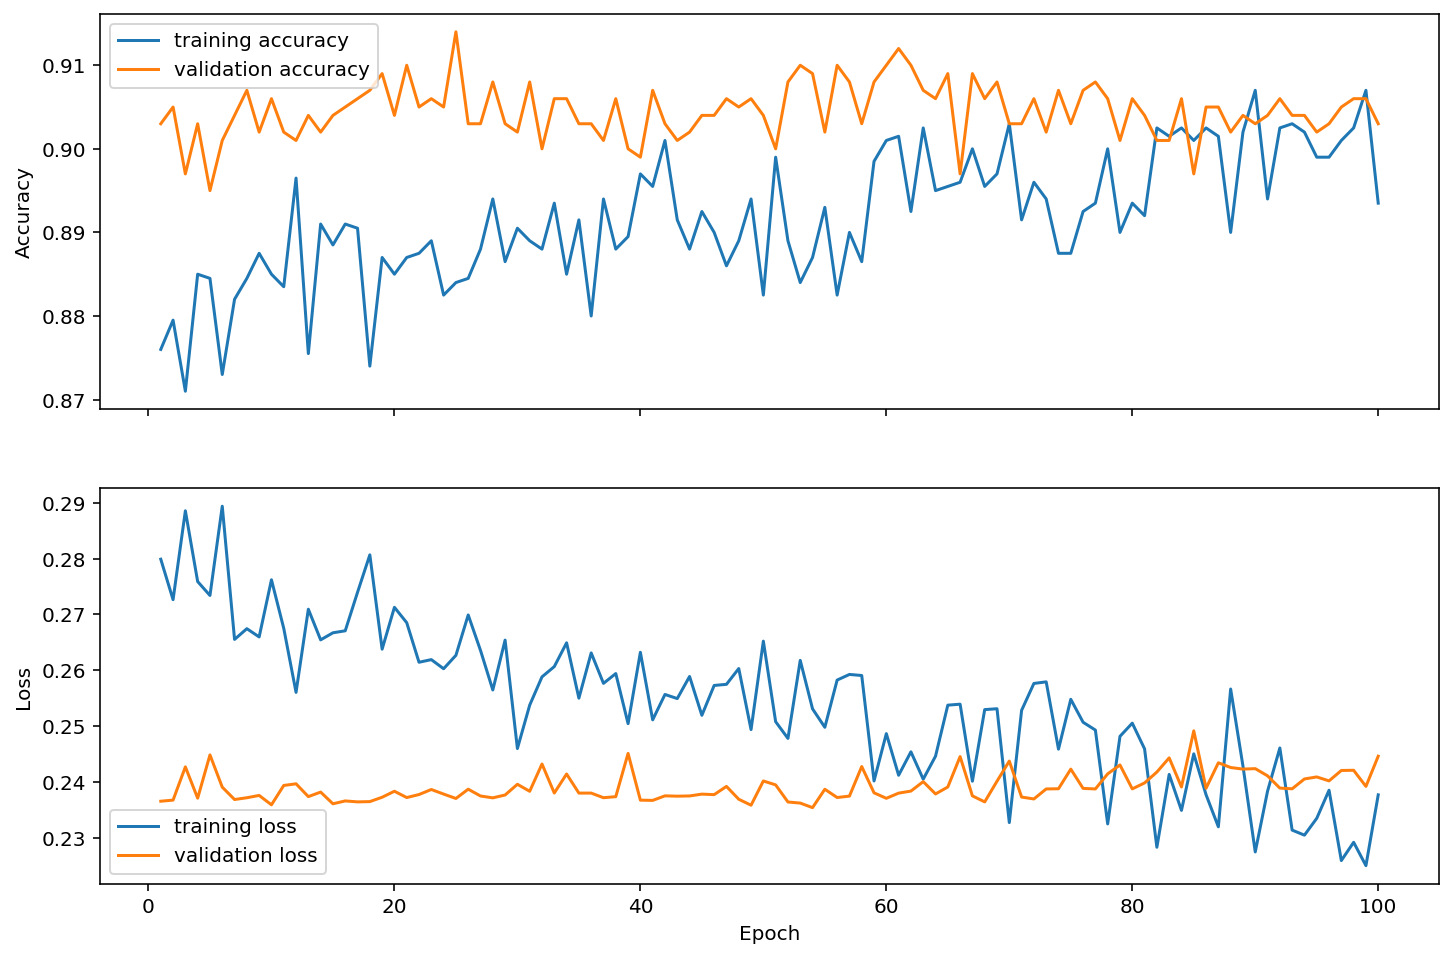

In [131]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ax[0].plot(epochs, dog_fine_tuned_acc, label='training accuracy')
ax[0].plot(epochs, dog_fine_tuned_val_acc, label='validation accuracy')
ax[1].plot(epochs, dog_fine_tuned_loss, label='training loss')
ax[1].plot(epochs, dog_fine_tuned_val_loss, label='validation loss')
ax[1].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[0].legend(loc=2)
ax[1].legend(loc=3)

In [128]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [129]:
dog_fine_tuned_acc_smooth = smooth_curve(dog_fine_tuned_acc)
dog_fine_tuned_loss_smooth = smooth_curve(dog_fine_tuned_loss)
dog_fine_tuned_val_acc_smooth = smooth_curve(dog_fine_tuned_val_acc)
dog_fine_tuned_val_loss_smooth = smooth_curve(dog_fine_tuned_val_loss)

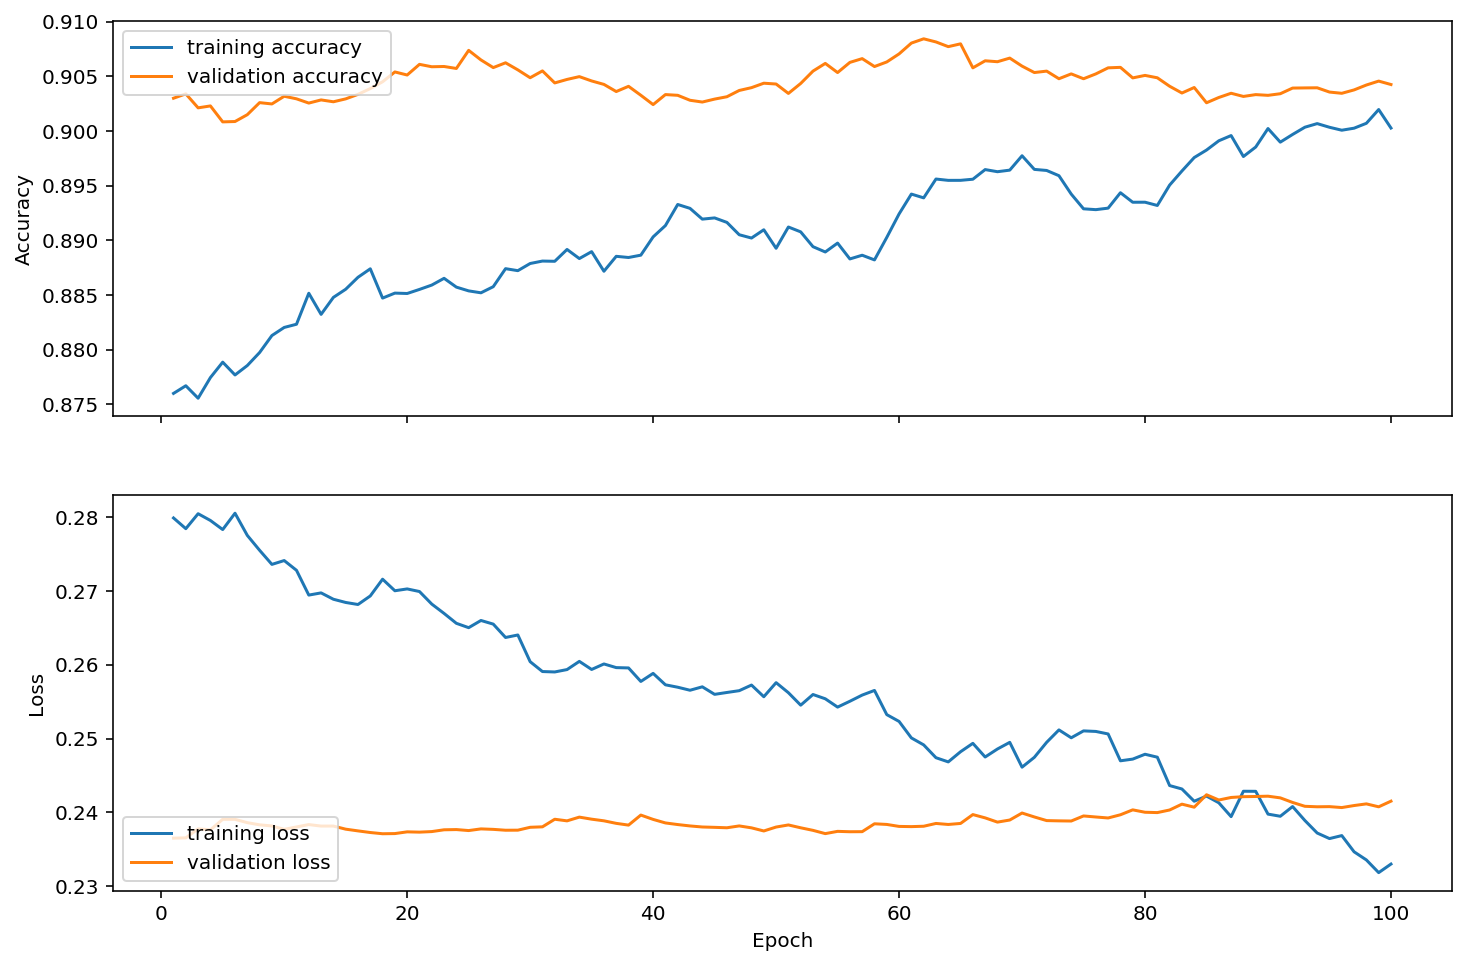

In [130]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ax[0].plot(epochs, dog_fine_tuned_acc_smooth, label='training accuracy')
ax[0].plot(epochs, dog_fine_tuned_val_acc_smooth, label='validation accuracy')
ax[1].plot(epochs, dog_fine_tuned_loss_smooth, label='training loss')
ax[1].plot(epochs, dog_fine_tuned_val_loss_smooth, label='validation loss')
ax[1].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[0].legend(loc=2)
ax[1].legend(loc=3)

# Visualizing What Convnets Learn

## Visualizing Intermediate Activations

Visualizing intermediate activations consists of dislpaying the feature maps output by various convolution and pooling layers. Let's load the second model that we had trained.

In [91]:
model = keras.models.load_model('dogs_and_cats_small_2.h5')

In [92]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)      

We will feed the network an image of a cat that was not part of the images that the network was trained on.

In [98]:
img_path = '/Volumes/WD External/KerasDeepLearning/dogs_and_cats_small/test/cats/cat.1700.jpg'

In [95]:
from tensorflow.keras.preprocessing import image

In [99]:
img = image.load_img(img_path, target_size=(150, 150))

In [100]:
img_tensor = image.img_to_array(img)

In [101]:
img_tensor.shape

(150, 150, 3)

In [103]:
img_tensor = np.expand_dims(img_tensor, axis=0)

In [104]:
img_tensor.shape

(1, 150, 150, 3)

In [105]:
img_tensor /= 255.

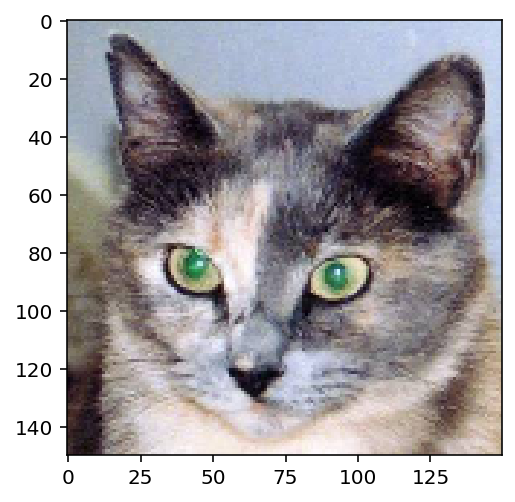

In [108]:
plt.imshow(img_tensor[0])

To extract the feature maps, we need to create a keras model that takes batches of images as inputs, and outputs the activations of all convolution and pooling layers.

In [109]:
from tensorflow.keras import models

In [110]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [111]:
activations = activation_model.predict(img_tensor)

In [112]:
first_layer_activation = activations[0]

In [113]:
first_layer_activation.shape

(1, 148, 148, 32)

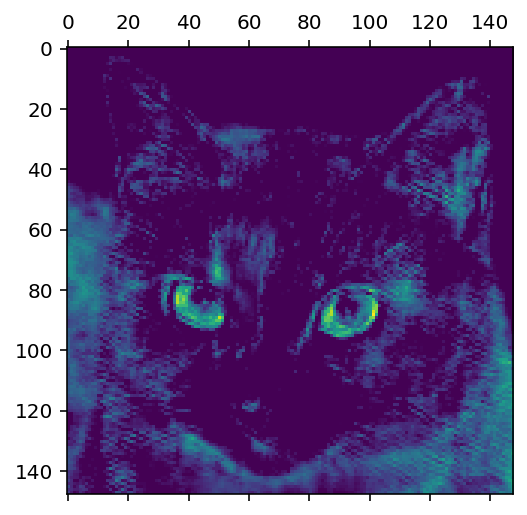

In [114]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

This channel looks to encode some of the features of the eyes. Let's look at the seventh channel.

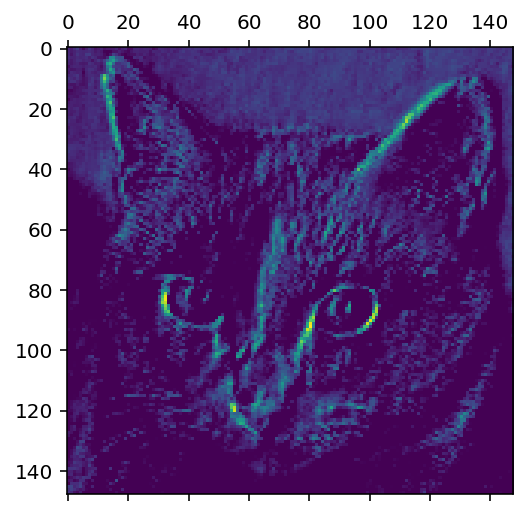

In [115]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

This looks like it encodes vertical straight lines. Let's look at all of them as one big image tensor.